# Classification on Mnist Fashion dataset

## [Reference](https://www.tensorflow.org/tutorials/keras/classification)

## Import necessary files

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Explore the dataset

In [7]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [9]:
len(train_images), len(test_images)

(60000, 10000)

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

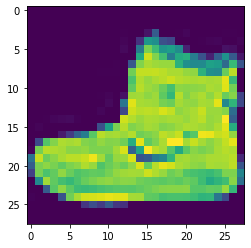

In [11]:
plt.imshow(train_images[0])

## Normalizing the image for to train faster

In [10]:
(train_images, test_images) = train_images / 255.0, test_images / 255.0

## Model Definition

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## Model compilation and model training

In [18]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs = 10, verbose = 2)

Epoch 1/10
1875/1875 - 2s - loss: 1.7284 - accuracy: 0.7365
Epoch 2/10
1875/1875 - 2s - loss: 1.6796 - accuracy: 0.7809
Epoch 3/10
1875/1875 - 2s - loss: 1.6202 - accuracy: 0.8413
Epoch 4/10
1875/1875 - 2s - loss: 1.6068 - accuracy: 0.8543
Epoch 5/10
1875/1875 - 2s - loss: 1.5992 - accuracy: 0.8623
Epoch 6/10
1875/1875 - 2s - loss: 1.5945 - accuracy: 0.8664
Epoch 7/10
1875/1875 - 2s - loss: 1.5905 - accuracy: 0.8702
Epoch 8/10
1875/1875 - 2s - loss: 1.5882 - accuracy: 0.8728
Epoch 9/10
1875/1875 - 3s - loss: 1.5854 - accuracy: 0.8753
Epoch 10/10
1875/1875 - 3s - loss: 1.5829 - accuracy: 0.8778


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('Accuracy: ',test_acc)

313/313 - 0s - loss: 1.5928 - accuracy: 0.8678
Accuracy:  0.8677999973297119


## Lets test the model

In [21]:
predictions = model.predict(test_images)

In [27]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0] # Lets check the prediction.

9

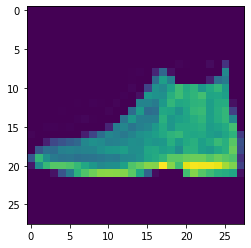

In [29]:
label = np.argmax(predictions[0])
plt.imshow(test_images[0])

In [33]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

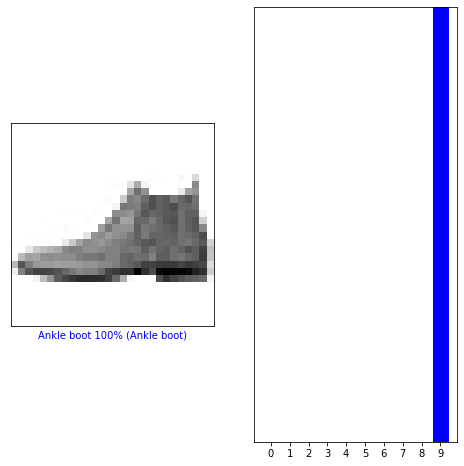

In [34]:
i = 0
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

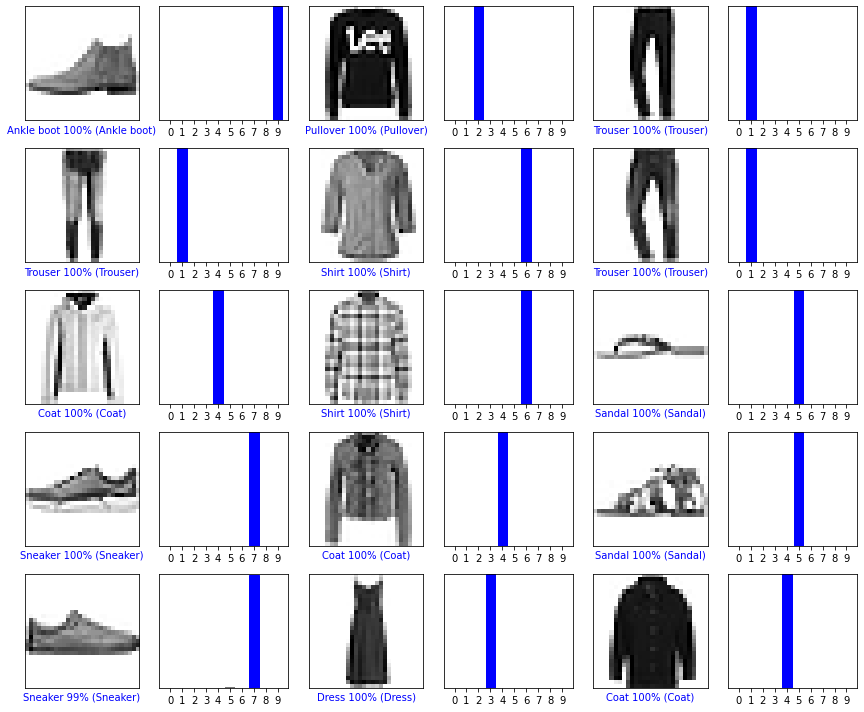

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()